# Introduction

This is a case study on smart device fitness data in order to unlock new growth opportunities for Bellabeat, a high-tech manufacturer of health-focused products for women, as the capstone project for my **Google Data Analytics Professional Certificate**. The main purpose of the case study is to find out the trends in smart device usage, and how these trends can be applied in guiding Bellabeat marketing strategy by analyzing smart device usage and data.

# Background Information
### Product
Bellabeat offers various products and services to its customers, including:

1. Bellabeat app, which provides users with health data related to their activity, sleep, stress, menstrual cycle, and mindfulness habits collected by 3 different kinds of smart wellness trackers: 
2. Leaf, the classic one that can be worn as a bracelet, necklace, or clip, 
3. Time, a wellness watch combines the timeless look of a classic timepiece with smart technology,and 
4. Spring, the water bottle that tracks daily water intake using smart technology.
5. Bellabeat membership, which gives 24/7 access to fully personalized guidance on nutrition, activity, sleep, health and beauty, and mindfulness based on their lifestyle and goals.

<br>

### Current marketing strategy
Bellabeat invests in Traditional advertising media, such as radio, out-of-home billboards, print, and television, but focuses on digital marketing extensively. 

The company invests year-round in Google Search, maintaining active Facebook and Instagram pages, and consistently engages consumers on Twitter. Additionally, Bellabeat runs video ads on Youtube and displays ads on the Google Display Network to support campaigns around key marketing dates.

<br>

# Method applied
In the stage of data analytics, the general process of data analytics **APPASA approach** will be applied in this case study, which includes **Ask, Prepare, Process, Analyze, Share, and Act**.

<br>

# Description the data 
From the “FitBit Fitness Tracker Data” Dataset, we accessed the data which generated by 30 respondents to a distributed survey via Amazon Mechanical Turk between 03.12.2016 - 05.12.2016 whose consented to the submission of personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring, provided by Möbius under license CC0: Public Domain. Which means the dataset can be used by us to work on our analysis without restriction under copyright law, and all the data from this dataset is collected with the user's consent.

The data set includes minute-level output for physical activity, heart rate, and sleep monitoring. Individual reports can be parsed by export session ID or timestamp. Which can be divided into 3 groups: 1. data in minute-level ; 2. data in hour-level ; 3. merged summary data. For this analysis, merged summary data will be mainly applied with the support of data at minute/hour-level.

While the dataset has a few problems that make the final insight may not be very accurate as the data is not up-to-date. First, there's a difference in data size (Nos. of observation: dailyactivity > sleepdata > weightinfo), the analysis in relationship on dailyactivity and weightinfo may lack data supported. Also, the data is collected by voluntary submission, a kind of survivorship bias may occur in the dataset since the better the data performed, the users are more willing to share out, vise versa. 

Need to find how many users occured in all dataset. (find out how many users ID occured in all dataset)

<br>

# Step 1 - Ask 
### Define the business Task
This case study is trying to analyze smart device usage and data in order to gain insight into how consumers are already using their smart devices. To start with the case study, we first need to find out the trends in smart device usage, and then apply these trends to Bellabeat customers and help influence Bellabeat marketing strategy. 

To make it specific, **we will study the current usage of smart devices, apply the results to figure out what our products can improve in, which product should be mainly promoted, who should be our target audience.**

<br>

### Key stakeholders
- Urška Sršen: Bellabeat’s co-founder and Chief Creative Officer 
- Sando Mur: Mathematician and Bellabeat co-founder; key member of the Bellabeat executive team
- Bellabeat executive team  

<br>

### Question interested
- Generally, when will user apply these smart devices?
- How lond the user sleep? 
- Is there a relationship between Total Distance and Calories Burned?
- Is there a relationship between Total Distance and Total Minutes Asleep?
- What is the distribution of activity in Minutes? (compare to government suggested time?)
- What is the distribution of activity in Distance?
<br>

# Step 2 - Prepare
### Environment Set-Up

In [1]:
import pandas as pd
import numpy as np

import re
import math

from pandas.api.types import CategoricalDtype
import warnings
warnings.filterwarnings("ignore")

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('ticks')
sns.set(rc={'figure.figsize':(15,10)})
plt.rcParams["figure.figsize"] = (20,3)


%matplotlib inline

import plotly.express as px
import cufflinks as cf
cf.go_offline()

In [3]:
dailyActivity = pd.read_csv('/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv', parse_dates={'Date': [1]}) 
sleepDay = pd.read_csv('/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv', parse_dates={'Date': [1]}) 

In [4]:
#### dailyActivity
dailyActivity.insert(1, 'Day', dailyActivity['Date'].dt.day_name())
dailyActivity

,Date,Day,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,2016-04-12,Tuesday,1503960366,13162,8.500000,8.500000,0.0,1.88,0.55,6.06,0.00,25,13,328,728,1985
1,2016-04-13,Wednesday,1503960366,10735,6.970000,6.970000,0.0,1.57,0.69,4.71,0.00,21,19,217,776,1797
2,2016-04-14,Thursday,1503960366,10460,6.740000,6.740000,0.0,2.44,0.40,3.91,0.00,30,11,181,1218,1776
3,2016-04-15,Friday,1503960366,9762,6.280000,6.280000,0.0,2.14,1.26,2.83,0.00,29,34,209,726,1745
4,2016-04-16,Saturday,1503960366,12669,8.160000,8.160000,0.0,2.71,0.41,5.04,0.00,36,10,221,773,1863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,2016-05-08,Sunday,8877689391,10686,8.110000,8.110000,0.0,1.08,0.20,6.80,0.00,17,4,245,1174,2847
936,2016-05-09,Monday,8877689391,20226,18.250000,18.250000,0.0,11.10,0.80,6.24,0.05,73,19,217,1131,3710
937,2016-05-10,Tuesday,8877689391,10733,8.150000,8.150000,0.0,1.35,0.46,6.28,0.00,18,11,224,1187,2832
938,2016-05-11,Wednesday,8877689391,21420,19.559999,19.559999,0.0,13.22,0.41,5.89,0.00,88,12,213,1127,3832


In [5]:
dailyActivity.describe()

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,2303.609574
std,2.424805e+09,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,718.166862
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.320127e+09,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,1828.500000
50%,4.445115e+09,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,2134.000000
75%,6.962181e+09,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000
max,8.877689e+09,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000


In [6]:
dailyActivity.isna().sum()

Date                        0
Day                         0
Id                          0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64

In [7]:
print(f"For dailyActivity:\nNumbers of uniques date:{dailyActivity.Date.nunique()}\n{dailyActivity.Date.unique()}\n")
print(f"For dailyActivity:\nNumbers of uniques ID:{dailyActivity.Id.nunique()}\n{dailyActivity.Id.unique()}")

For dailyActivity:
Numbers of uniques date:31
['2016-04-12T00:00:00.000000000' '2016-04-13T00:00:00.000000000'
 '2016-04-14T00:00:00.000000000' '2016-04-15T00:00:00.000000000'
 '2016-04-16T00:00:00.000000000' '2016-04-17T00:00:00.000000000'
 '2016-04-18T00:00:00.000000000' '2016-04-19T00:00:00.000000000'
 '2016-04-20T00:00:00.000000000' '2016-04-21T00:00:00.000000000'
 '2016-04-22T00:00:00.000000000' '2016-04-23T00:00:00.000000000'
 '2016-04-24T00:00:00.000000000' '2016-04-25T00:00:00.000000000'
 '2016-04-26T00:00:00.000000000' '2016-04-27T00:00:00.000000000'
 '2016-04-28T00:00:00.000000000' '2016-04-29T00:00:00.000000000'
 '2016-04-30T00:00:00.000000000' '2016-05-01T00:00:00.000000000'
 '2016-05-02T00:00:00.000000000' '2016-05-03T00:00:00.000000000'
 '2016-05-04T00:00:00.000000000' '2016-05-05T00:00:00.000000000'
 '2016-05-06T00:00:00.000000000' '2016-05-07T00:00:00.000000000'
 '2016-05-08T00:00:00.000000000' '2016-05-09T00:00:00.000000000'
 '2016-05-10T00:00:00.000000000' '2016-05-11

In [8]:
dailyActivity.groupby("Id")["Day"].count()

Id
1503960366    31
1624580081    31
1644430081    30
1844505072    31
1927972279    31
2022484408    31
2026352035    31
2320127002    31
2347167796    18
2873212765    31
3372868164    20
3977333714    30
4020332650    31
4057192912     4
4319703577    31
4388161847    31
4445114986    31
4558609924    31
4702921684    31
5553957443    31
5577150313    30
6117666160    28
6290855005    29
6775888955    26
6962181067    31
7007744171    26
7086361926    31
8053475328    31
8253242879    19
8378563200    31
8583815059    31
8792009665    29
8877689391    31
Name: Day, dtype: int64

In [9]:
#### sleepDay
sleepDay

,Date,Id,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,2016-04-12,1503960366,1,327,346
1,2016-04-13,1503960366,2,384,407
2,2016-04-15,1503960366,1,412,442
3,2016-04-16,1503960366,2,340,367
4,2016-04-17,1503960366,1,700,712
...,...,...,...,...,...
408,2016-04-30,8792009665,1,343,360
409,2016-05-01,8792009665,1,503,527
410,2016-05-02,8792009665,1,415,423
411,2016-05-03,8792009665,1,516,545


In [10]:
sleepDay.describe()

,Id,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
count,4.130000e+02,413.000000,413.000000,413.000000
mean,5.000979e+09,1.118644,419.467312,458.639225
std,2.060360e+09,0.345521,118.344679,127.101607
min,1.503960e+09,1.000000,58.000000,61.000000
25%,3.977334e+09,1.000000,361.000000,403.000000
50%,4.702922e+09,1.000000,433.000000,463.000000
75%,6.962181e+09,1.000000,490.000000,526.000000
max,8.792010e+09,3.000000,796.000000,961.000000


# Step 3 & 4 - Process and Analyse 


In [11]:
merged_df = pd.merge(dailyActivity,sleepDay, on=['Id','Date'],how ='left')
merged_df

,Date,Day,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,2016-04-12,Tuesday,1503960366,13162,8.500000,8.500000,0.0,1.88,0.55,6.06,0.00,25,13,328,728,1985,1.0,327.0,346.0
1,2016-04-13,Wednesday,1503960366,10735,6.970000,6.970000,0.0,1.57,0.69,4.71,0.00,21,19,217,776,1797,2.0,384.0,407.0
2,2016-04-14,Thursday,1503960366,10460,6.740000,6.740000,0.0,2.44,0.40,3.91,0.00,30,11,181,1218,1776,NaN,NaN,NaN
3,2016-04-15,Friday,1503960366,9762,6.280000,6.280000,0.0,2.14,1.26,2.83,0.00,29,34,209,726,1745,1.0,412.0,442.0
4,2016-04-16,Saturday,1503960366,12669,8.160000,8.160000,0.0,2.71,0.41,5.04,0.00,36,10,221,773,1863,2.0,340.0,367.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,2016-05-08,Sunday,8877689391,10686,8.110000,8.110000,0.0,1.08,0.20,6.80,0.00,17,4,245,1174,2847,NaN,NaN,NaN
939,2016-05-09,Monday,8877689391,20226,18.250000,18.250000,0.0,11.10,0.80,6.24,0.05,73,19,217,1131,3710,NaN,NaN,NaN
940,2016-05-10,Tuesday,8877689391,10733,8.150000,8.150000,0.0,1.35,0.46,6.28,0.00,18,11,224,1187,2832,NaN,NaN,NaN
941,2016-05-11,Wednesday,8877689391,21420,19.559999,19.559999,0.0,13.22,0.41,5.89,0.00,88,12,213,1127,3832,NaN,NaN,NaN


<AxesSubplot:>

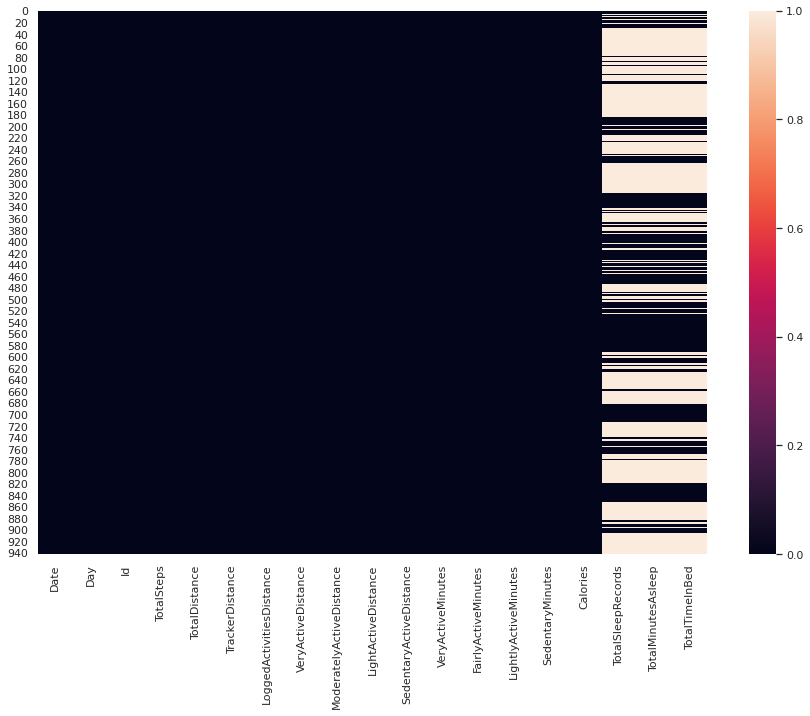

In [12]:
missing_values = merged_df.isna()
plt.figure(figsize=(15,10))
sns.heatmap(data = missing_values)

In [13]:
merged_df.dropna(inplace=True)

<AxesSubplot:>

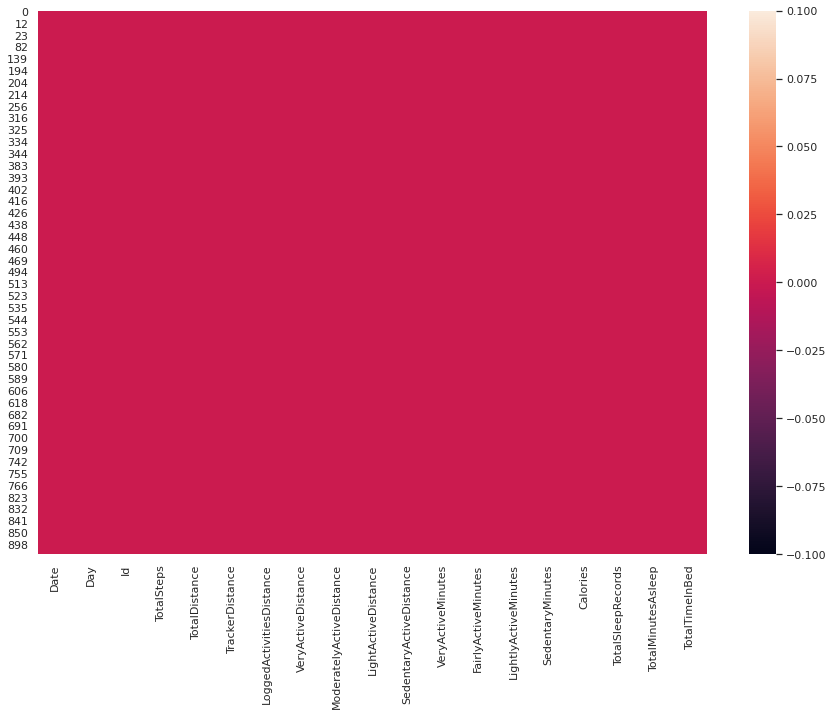

In [14]:
missing_values = merged_df.isna()
plt.figure(figsize=(15,10))
sns.heatmap(data = missing_values)

# Step 5 - Share

Insight and graph to prove, just like conclusion

In [15]:
merged_df.columns

Index(['Date', 'Day', 'Id', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories',
       'TotalSleepRecords', 'TotalMinutesAsleep', 'TotalTimeInBed'],
      dtype='object')

<AxesSubplot:>

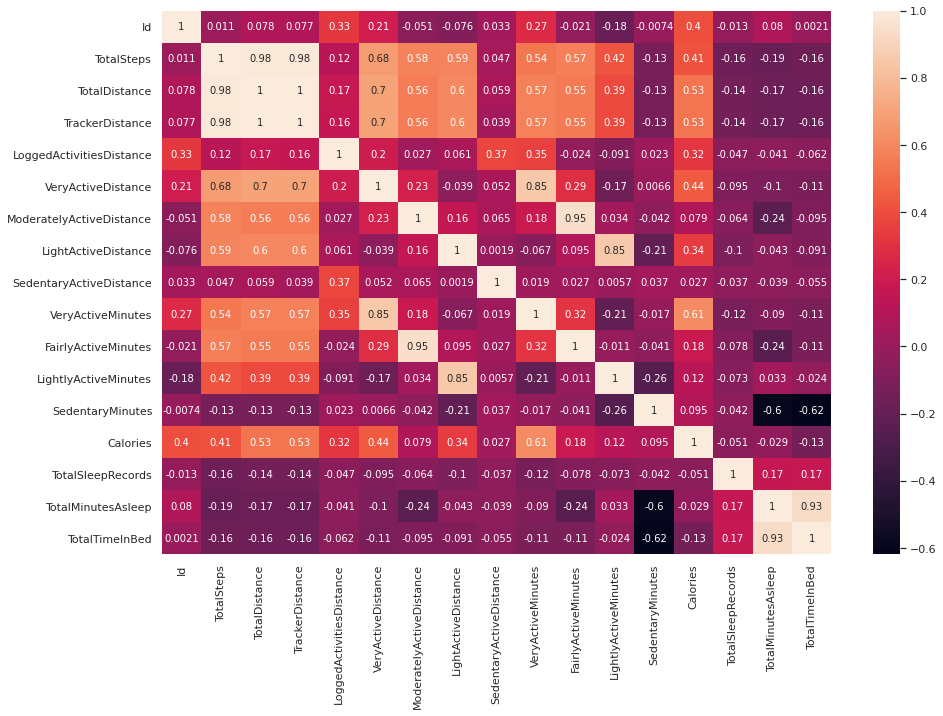

In [16]:
plt.figure(figsize=(15,10))
merged_df_corr = merged_df.corr()
sns.heatmap(data = merged_df_corr,annot=True)

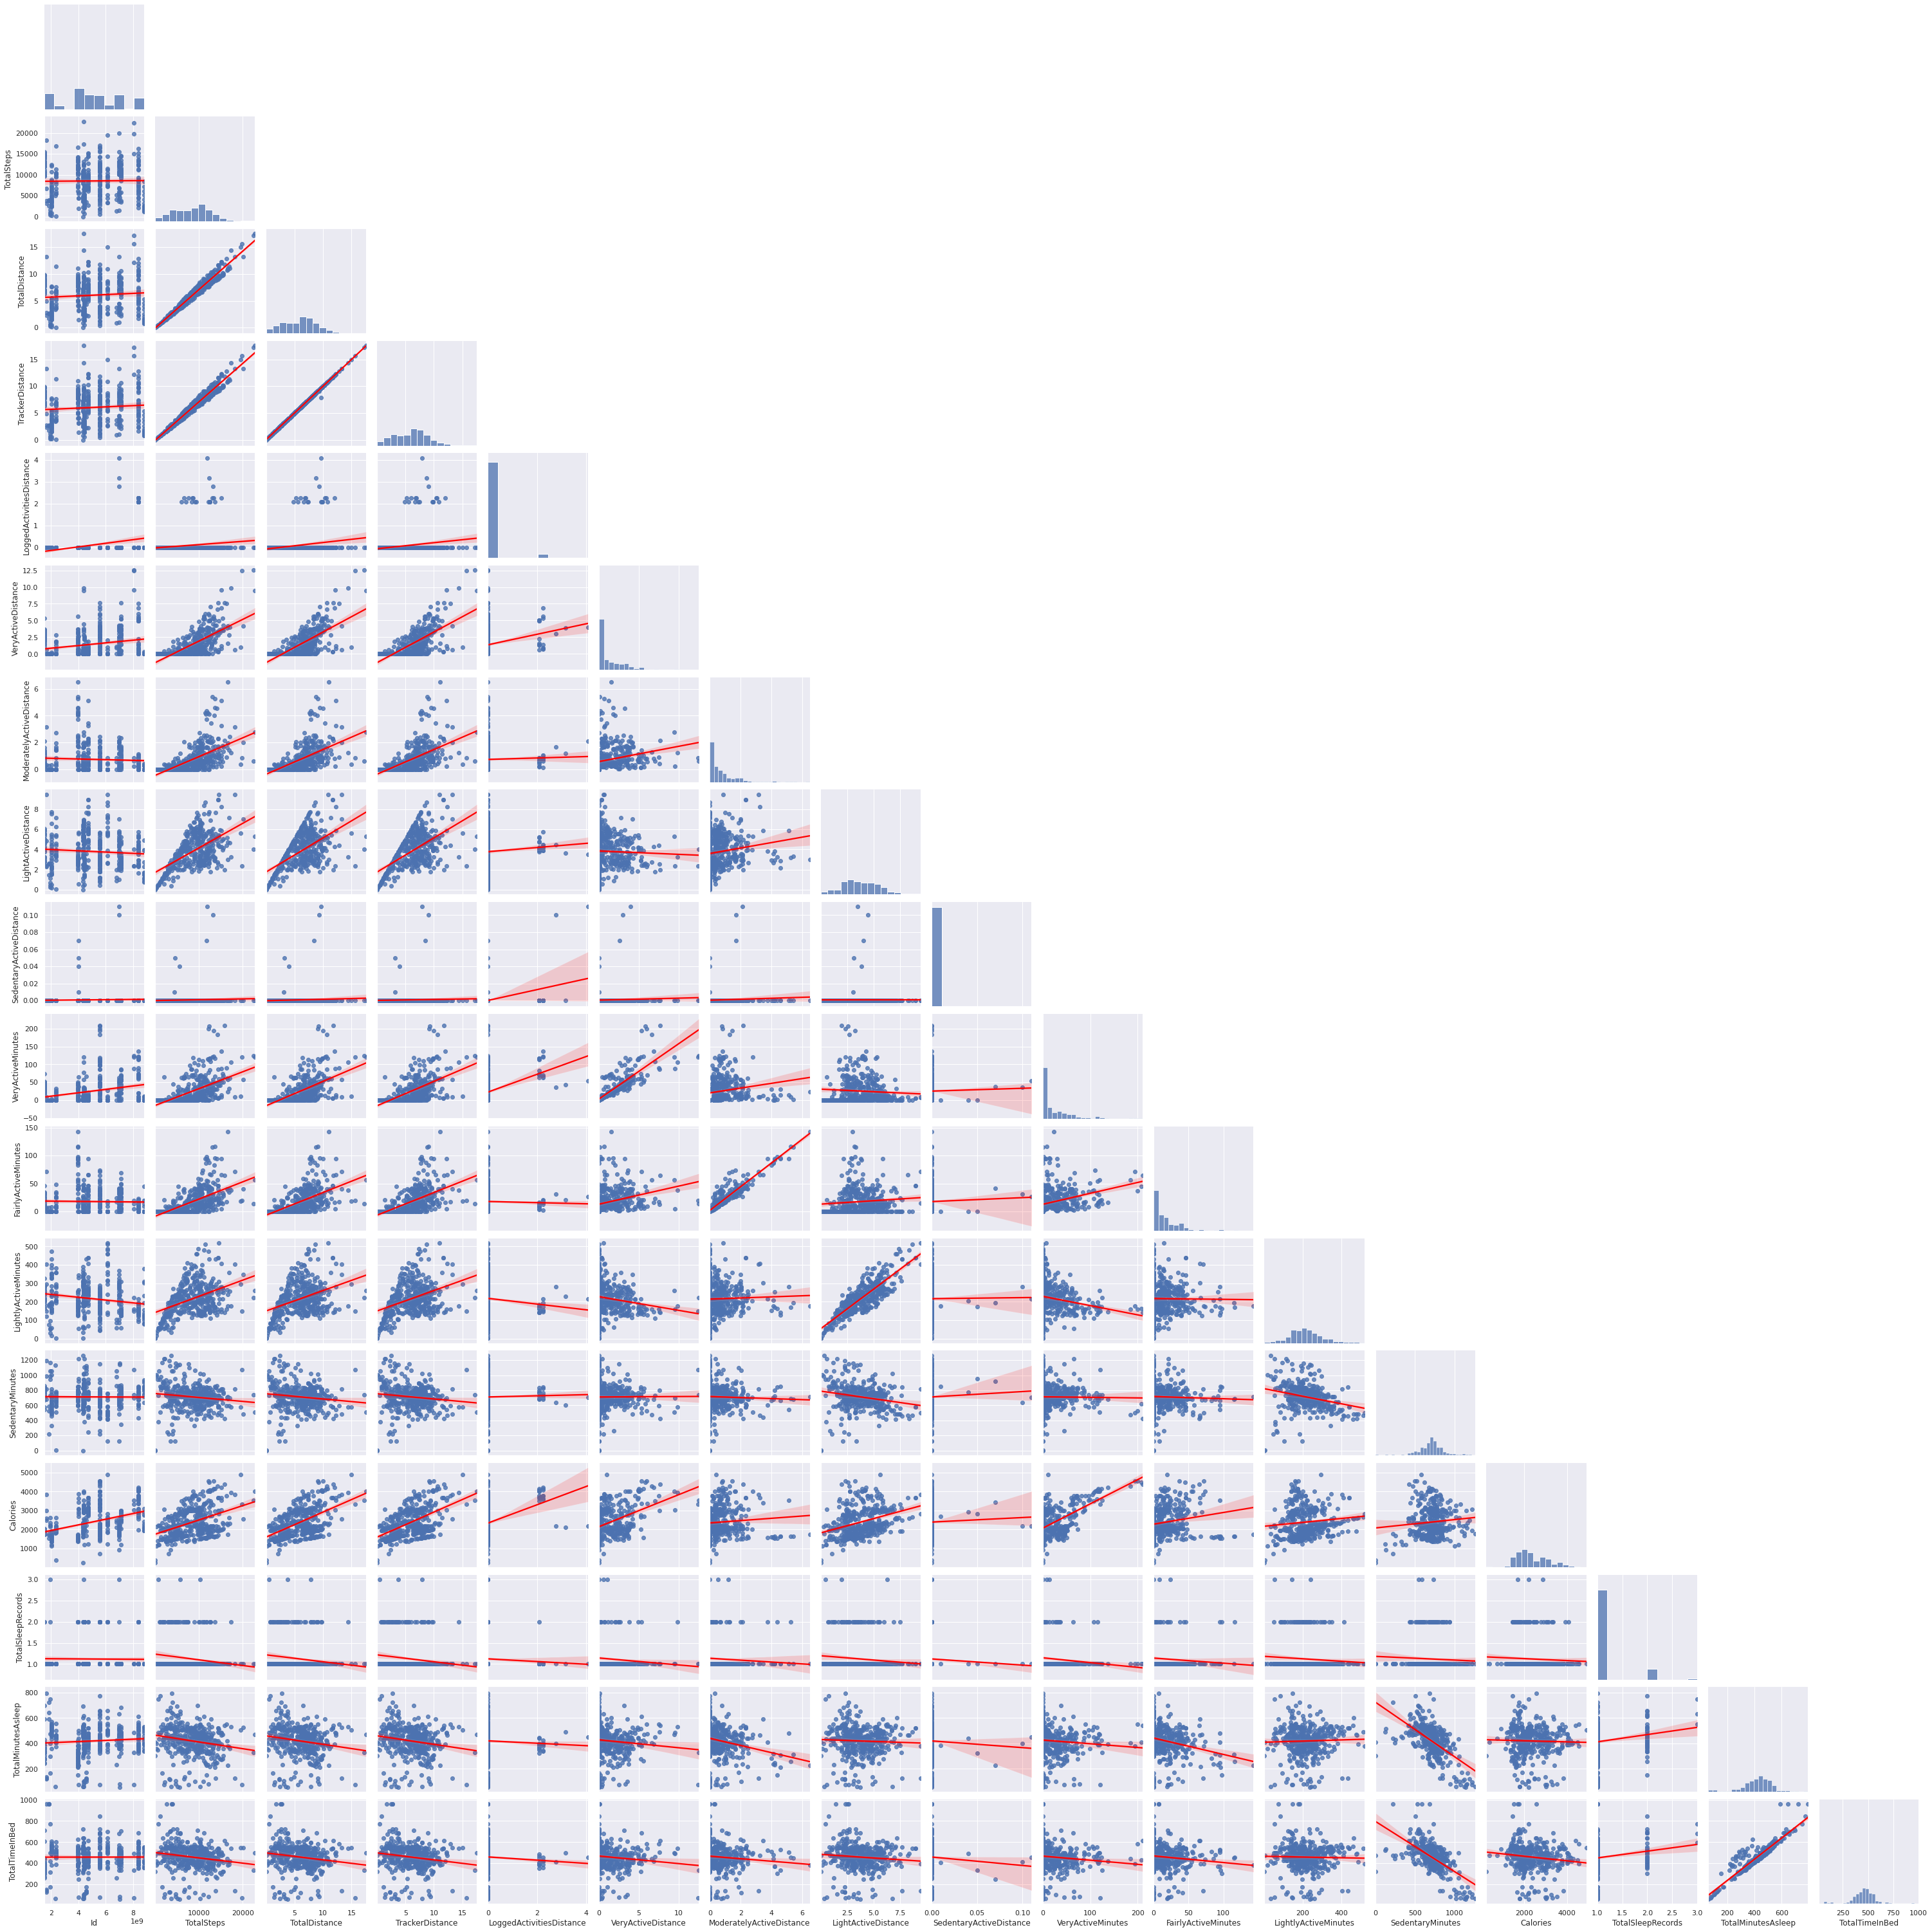

In [17]:
sns.pairplot(data=merged_df, kind="reg", plot_kws={'line_kws':{'color':'red'}} , corner=True)

Text(0.5, 1.0, 'Number of Users in each day')

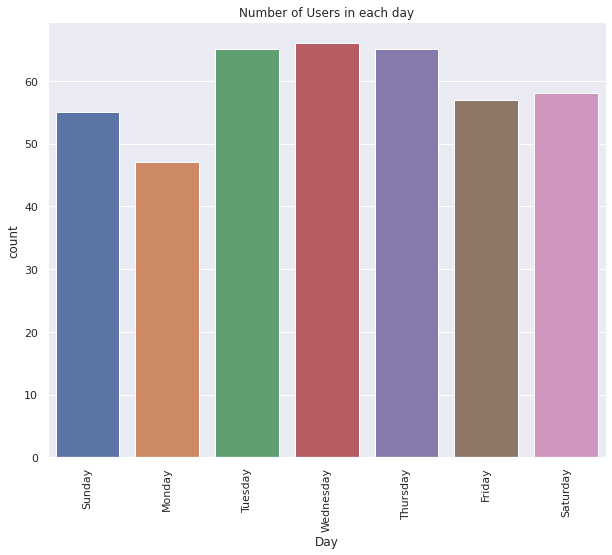

In [18]:
plt.figure(figsize=(10,8))
sns.countplot(x="Day", data=merged_df, 
              order=["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"])
plt.xticks(rotation = 90)
plt.title("Number of Users in each day")

#### Finding
From this above plot, we can observe that **most of the users applied the smart devices on Wednesday, Tuesday, and Thursday, normal weekdays.**

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Sunday'),
  Text(1, 0, 'Monday'),
  Text(2, 0, 'Tuesday'),
  Text(3, 0, 'Wednesday'),
  Text(4, 0, 'Thursday'),
  Text(5, 0, 'Friday'),
  Text(6, 0, 'Saturday')])

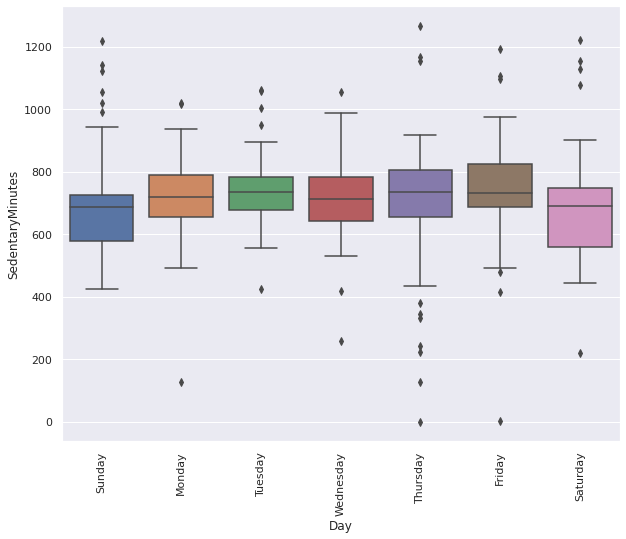

In [19]:
plt.figure(figsize=(10,8))
sns.boxplot(x="Day",y="SedentaryMinutes",data=merged_df,
           order=["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"])
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Sunday'),
  Text(1, 0, 'Monday'),
  Text(2, 0, 'Tuesday'),
  Text(3, 0, 'Wednesday'),
  Text(4, 0, 'Thursday'),
  Text(5, 0, 'Friday'),
  Text(6, 0, 'Saturday')])

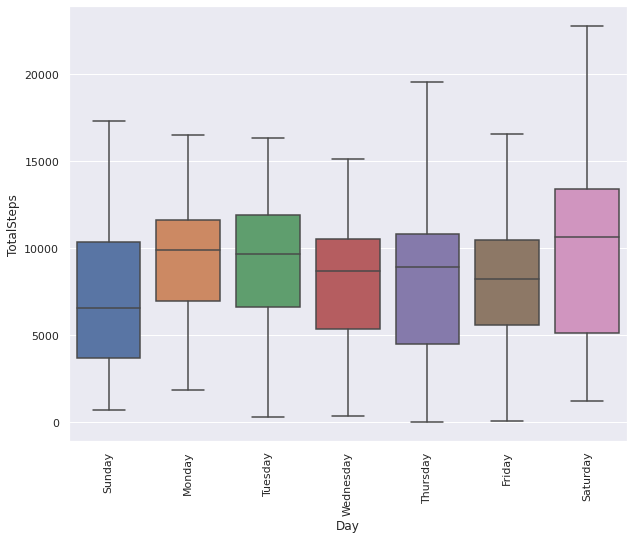

In [20]:
plt.figure(figsize=(10,8))
sns.boxplot(x="Day",y="TotalSteps",data=merged_df,
           order=["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"])
plt.xticks(rotation=90)

#### Finding
From the sedentary of day plot, we can observe that **users have a longer sedentary on a weekday as the box located higher than on weekend, one of the possible reasons is that they are working and sitting in the office on a weekday.**

From the Total Steps of day plot, we can observe that generally **users walk most on Saturday and walk the least on Sunday.**

Text(0.5, 1.0, '')

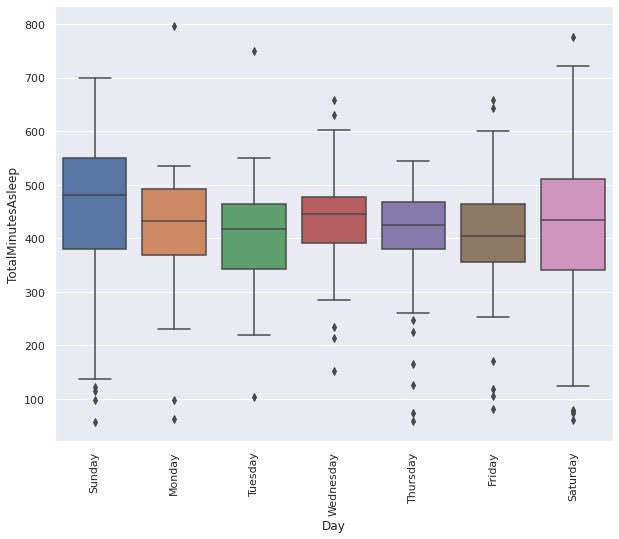

In [21]:
plt.figure(figsize=(10,8))
sns.boxplot(x="Day",y="TotalMinutesAsleep",data=merged_df,
           order=["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"])
plt.xticks(rotation=90)
plt.title("")

#### Finding
The box shows that **users tend to have a longer sleep time on the weekend when compares with the sleeping time on weekday.**

Text(0.5, 1.0, 'Total Distance vs Calories Burned')

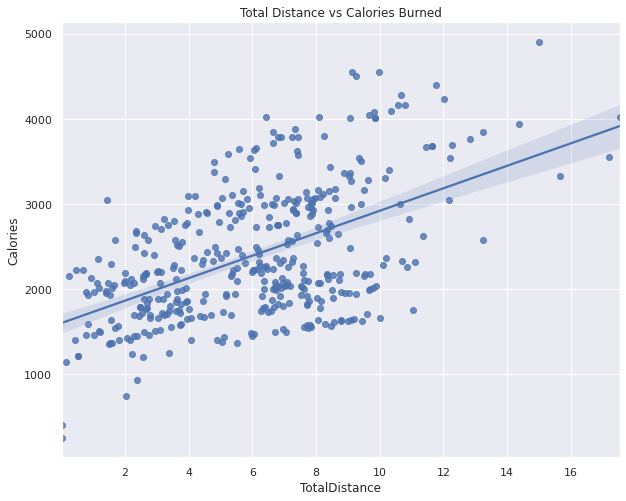

In [22]:
plt.figure(figsize=(10,8))
sns.regplot (x="TotalDistance",y="Calories",data=merged_df)
plt.title("Total Distance vs Calories Burned")

Text(0.5, 1.0, 'Total Steps vs Total Minutes Asleep')

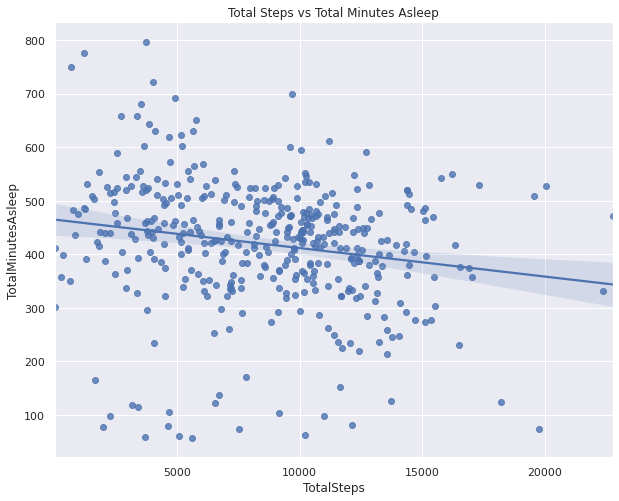

In [23]:
plt.figure(figsize=(10,8))
sns.regplot (x="TotalSteps",y="TotalMinutesAsleep",data=merged_df)
plt.title("Total Steps vs Total Minutes Asleep")

#### Finding
As general, **walk more will burn more calories, while walk less, did not sleep more.**

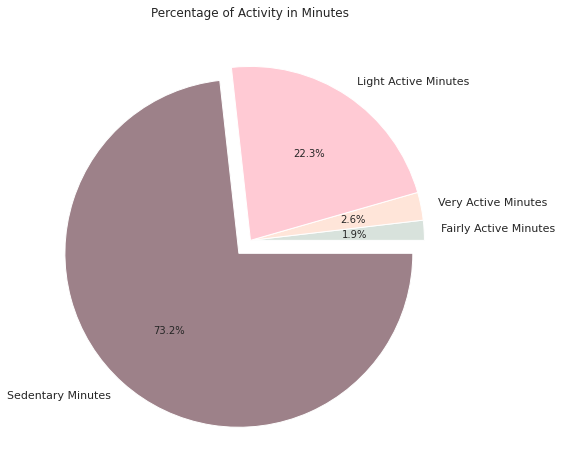

In [24]:
merged_df['TotalMinutes'] = merged_df['LightlyActiveMinutes'] + merged_df['FairlyActiveMinutes'] + merged_df['VeryActiveMinutes'] + merged_df['SedentaryMinutes']

activitiesm_means = merged_df['TotalMinutes'].mean()
lightlym_pcr = (merged_df['LightlyActiveMinutes'].mean()/activitiesm_means) * 100
fairlym_pcr = (merged_df['FairlyActiveMinutes'].mean()/activitiesm_means) * 100
verym_pcr = (merged_df['VeryActiveMinutes'].mean()/activitiesm_means) * 100
sedentarym_pcr = (merged_df['SedentaryMinutes'].mean()/activitiesm_means) * 100

# plotting
plt.figure(figsize=(10,8))
plt.pie([ fairlym_pcr, verym_pcr,lightlym_pcr,sedentarym_pcr], 
        labels = [ "Fairly Active Minutes", "Very Active Minutes", "Light Active Minutes", "Sedentary Minutes"], 
        colors = ['#d8e2dc', '#ffe5d9', '#ffcad4', '#9d8189'], 
        # wedgeprops = {"edgecolor": "black"}, 
        explode = [0, 0, 0, 0.1], 
        autopct = "%1.1f%%")

plt.title("Percentage of Activity in Minutes")
plt.show()

#### Finding
**Almost 3/4 of the total time user spends is sedentary minutes, and Light Active minutes only got 22.3% of the total time of usage. One of the possible reasons is that users wear smart devices all day, not only when they getting exercise.**

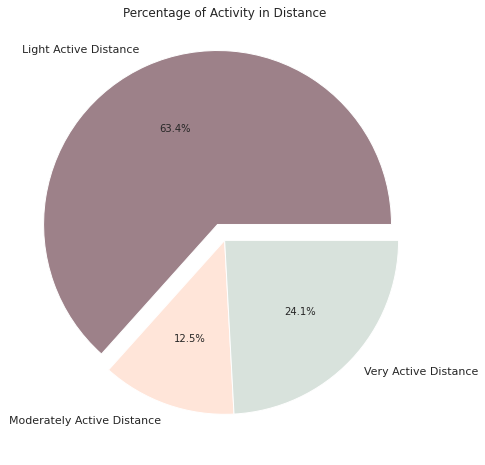

In [25]:
activities_means = merged_df["TotalDistance"].mean()

lightly_pcr = (merged_df['LightActiveDistance'].mean()/activities_means) * 100
moderately_pcr = (merged_df['ModeratelyActiveDistance'].mean()/activities_means) * 100
very_pcr = (merged_df['VeryActiveDistance'].mean()/activities_means) * 100

plt.figure(figsize=(10,8))
plt.pie([lightly_pcr, moderately_pcr, very_pcr], 
        labels = ["Light Active Distance", "Moderately Active Distance", "Very Active Distance"], 
        colors = ['#9d8189', '#ffe5d9', '#d8e2dc'],  
        explode = [0.1, 0, 0], 
        autopct = "%1.1f%%")


plt.title("Percentage of Activity in Distance")
plt.show()

#### Finding

**Almost 3/4 of the total time user spends is sedentary minutes, and Light Active minutes only got 22.3% of the total time of usage. One of the possible reasons is that users wear smart devices all day, not only when they getting exercise.**

#### Short Summary

<br>

**From the above finding, we can conclude that,**

1. Users tend to use smart devices on weekdays, especially on Wednesdays, but the total steps on Wednesdays are not the highest.

2. There is a positive relationship between Total Distance and Calories Burned. 

3. Users tend to walk more on Saturday and less on Sunday, one of the possible reasons is that they hand out with friends on Saturday night, and get more rest on Sunday. Which also explains in the Sleep data.

4. Almost 3/4 of the total time user spends is sedentary minutes, and Light Active minutes only got 22.3% of the total time of usage. One of the possible reasons is that users wear smart devices all day, not only when they getting exercise.

# Step 6 - Act

From the about data, I would suggest that Bellabeat can keep working hard on the current marketing strategy in the digital market. And I would recommend the brand add some new features as sending out encourage messages to its users and schedule planner on smart devices personalize on the users' data.

For example, the brand can send out these messages to its users on Wednesday, the day with the highest log-in with a lower work-out number as shown on the above graph. By doing this, it may help to enhance the customers' dependence on the brands, work out more, have more products with her journals. 

And with the help of the data, we can recognize that users are not likely to do exercise on weekends. Therefore we can train the machine on giving out a reasonable training schedule based on the user's data, like a light training on normal weekday, and end with a great one on Friday. 

